# Lista de Exercício 5
### Introdução à Visão Computacional (SEL0339/SEL5886)

**Instruções:**

 1. Esta lista consiste de 5 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0339-SEL5886_2021/blob/main/praticas/Lista_de_Exercicio_5.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/praticas/Lista_de_Exercicio_5.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Murilo Henrique Pasini Trevisan `

`Número USP: 9796078 `

### Introdução:

Esta lista de exercícios abordará o tema de imagens coloridas. 

No modelo *red*, *green* e *blue* (RGB), cada cor aparece em seus componentes espectrais primários de vermelho, verde e azul. As imagens representadas nesse modelo de cores consistem em três imagens componentes, uma para cada cor primária, como mostra a Figura 1. Quando alimentados em um monitor RGB, essas três imagens se combinam na tela para produzir uma imagem colorida composta. Essa imagem colorida pode ser representada computacionalmente por uma matriz tridimensional, onde os cada fatia da terceira dimensão representa um respectivo canal.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/5/56/RGB_channels_separation.png" style="width:650px;height:300px;"></center>

<center><caption><b> Figura 1:</b> Ilustração dos componentes espectrais primários vermelho, verde e azul em uma imagem colorida.</b></caption></center>

A espaço de cor *hue*, *saturation* e *value* (HSV - matiz, saturação e valor) é uma representação alternativa do modelo de cores RGB. Nesse modelo, as cores de cada matiz são dispostas em uma fatia radial, em torno de um eixo central de cores neutras que vai do preto na parte inferior ao branco na parte superior, como ilustrado pela Figura 2. A dimensão de saturação se assemelha a vários matizes de tinta colorida e a dimensão de valor se assemelha à mistura dessas tintas com quantidades variáveis de tinta preta ou branca. o modelo HSV é uma ferramenta útil para o desenvolvimento de algoritmos de processamento de imagem baseados em descrições de cores naturais e intuitivas para humanos, que, afinal, são os desenvolvedores e usuários desses algoritmos.

<center><img src="https://miro.medium.com/max/700/0*zh_KZ220_5YvNdda.png" width="379" height="284"></center>

<center><caption><b> Figura 2:</b> Modelo espacial para representação do espaço de cores HSV.</b></caption></center>

Referências:

*   Material da sala de aula;
*   Gonzalez and Woods, Digital Image Processing 4th;
*   OpenCV: [Changing Color-space](https://docs.opencv.org/master/df/d9d/tutorial_py_colorspaces.html);

Vamos importar as bibliotecas que iremos utilizar:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

from IPython.display import HTML
from base64 import b64encode

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática. 

In [2]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_05/bird.png", "bird.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_05/canal.png", "canal.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_05/paprika.png", "paprika.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_05/megaman.gif", "megaman.gif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_05/borboleta.bmp", "borboleta.bmp")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_05/borboleta.gif", "borboleta.gif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_05/ball-tracking-animated-02.gif", "ball-tracking-animated-02.gif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_05/ball_tracking_example.mp4", "ball_tracking_example.mp4")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

### 1) Imagens RGB

1.1) Espaço em memória das imagens.

**Exercício:**

1. Faça a leitura da imagem ```paprika.png```, transforme-a para escala de cinza e mostre ambas na tela.
2. Salve a imagem, tanto em **RGB** quanto em **escala de cinza**, no formato *bitmap* (bmp). Utilize os nomes ```paprika_rgb.bmp``` e ```paprika_gray.bmp``` para cada arquivo.
3. Compare o **tamanho em bytes** da imagem em ```.png``` e as duas em ```.bmp```. Mostre na tela a razão entre as duas imagens em *bitmap*. Utilize o formato ```A razão entre a imagem paprika_rgb e paprika_gray é de XX vezes```.

<details>    
<summary>
    <font size="3" color="darkblue"><b>Dicas:</b></font>
</summary>

*  A função ```cv.imread```, quando configurada para ler imagens coloridas, retorna os canais no formato ```BGR```. No entanto, a função ```plt.imshow``` trabalha somente no formato ```RGB```. Faça a transformação necessária. Pra isso, você pode utilizar técnicas regulares de programação ou a função [cv.cvtColor](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab). A tabela com todas as transformações possíveis estão nesse [link](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html). 
*  Você pode utilizar a função [cv.imwrite](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce) para salvar as imagens.
*  Utilize ```os.path.getsize``` para calcular o tamanho do arquivo da imagem. 
*  Você pode utilizar o argumento ```axis=-1``` da função ```np.mean``` para calcular a média aritmética ao longo do último eixo. 

*Ex:*
``` python
cv.cvtColor(myImg, cv.COLOR_space2space)
cv.imwrite("myImg.tif", myImg)
print("{} bytes".format(os.path.getsize("myImg.tif")))
```

tamanho da imagem em png = 98183
tamanho da imagem cinza bmp = 305078
tamanho da imagem colorida bmp = 912054
A razão entre a imagem paprika_rgb e paprika_gray é de 2.989576436190089vezes


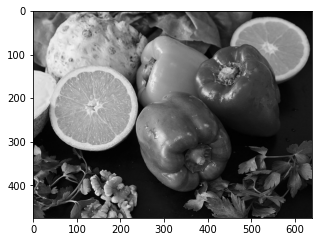

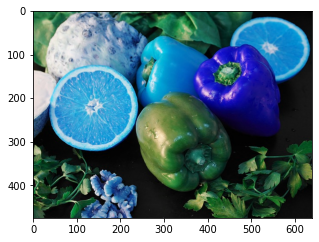

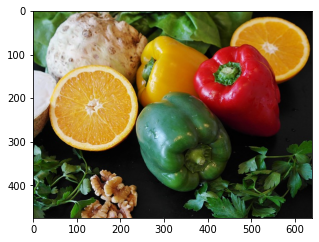

In [3]:
## -- Seu código começa AQUI -- ##


#Leitura
gray = cv.imread("paprika.png", cv.IMREAD_GRAYSCALE)
bgr  = cv.imread("paprika.png", cv.IMREAD_COLOR)

#Conversão
rgb = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)

#Plot na tela
plt.figure(figsize = (5,5))
plt.imshow(gray, cmap='gray')
plt.figure(figsize = (5,5))
plt.imshow(bgr)
plt.figure(figsize = (5,5))
plt.imshow(rgb)

#salvando a imagem em bmp
cv.imwrite('paprika_rgb.bmp', rgb)
cv.imwrite('paprika_gray.bmp', gray)

#Calcula os tamanhos
origin_lenght = os.path.getsize("paprika.png")
gray_lenght = os.path.getsize("paprika_gray.bmp")
rgb_lenght = os.path.getsize("paprika_rgb.bmp")

#Mostra os tamanhos individuais
print("tamanho da imagem em png = " + str(origin_lenght))
print("tamanho da imagem cinza bmp = " + str(gray_lenght))
print("tamanho da imagem colorida bmp = " + str(rgb_lenght))

#Mostra a razão dos tamanhos
print("A razão entre a imagem paprika_rgb e paprika_gray é de " + str(rgb_lenght/gray_lenght) + "vezes")

#como esperado a razão é 3 pois a imagem colorida possui 3 matrizes e a cinza uma matriz


## -- Seu código termina AQUI -- ##

### 2) Formato das imagens

Alguns dos formatos existentes para imagens coloridas:

*   O formato BMP - *Windows Bitmap*. Um formato de arquivo utilizado pra simples imagens sem compressão. Guarda a informação de quantos pixels a imagem contém e a cor de cada um expressa por 3 canais, cada um podendo assumir valor de 0 a 255 (para codificação em 8 bits).Item da lista
*   O formato JPG tem seu nome por utilizar o padrão de compressão JPEG (*Joint Photographic Experts Group*) para imagens de qualidade fotográfica. É um dos métodos mais populares de compactação de imagens na Internet. Seu sistema de codificação divide a imagem em blocos e os compara com padrões base da transformada discreta do cosseno (DCT) e estabelece o peso da presença de cada um desses padrões em cada bloco.
*   O formato GIF (*Graphic Interchange Format*). É freqüentemente usado para fazer pequenas animações e filmes curtos de baixa resolução para a Internet. Ideal para gráficos, logos e desenhos. Nesse padrão de compressão as cores são representadas por um conjunto de apenas 256 cores, sem a utilização de 3 canais RGB, como se dá com o uso do BMP.

Mais detalhes no capítulo 8 - Compressão de Imagem e Marca d'Água do livro: Gonzalez and Woods, Digital Image Processing 4th.

**Exercício:**

1. Faça a leitura da imagem ```megaman.gif```, salve-a nos formatos *.jpg* e *.bmp*. Em seguida, compare o tamanho dos arquivos das imagens imprimindo a quantidade de bytes de cada um.
2. Apresente as três imagens lado a lado em um tamanho que seja possível observar os detalhes nos valores dos pixels. Comente sobre as diferenças de memória utilizada e características visuais. Se achar necessário, selecione apenas uma região para plotar (como se fosse um zoom).
3. Faça a leitura da imagem ```borboleta.bmp```e salve-a no formato *.jpg*. Uma versão *.gif* já é fornecida, basta carregá-la. Da mesma forma como no exercício 2, plote as 3 imagens e comente sobre diferenças e tamanhos. Comente os resultados e diferenças.

<details>    
<summary>
    <font size="3" color="darkblue"><b>Dicas:</b></font>
</summary>

*  A função ```cv.imread```, quando configurada para ler imagens coloridas, retorna os canais no formato ```BGR```. No entanto, a função ```plt.imshow``` trabalha somente no formato ```RGB```. Faça a transformação necessária. Pra isso, você pode utilizar técnicas regulares de programação ou a função [cv.cvtColor](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab). A tabela com todas as transformações possíveis estão nesse [link](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html). 
*  Você pode utilizar a função [cv.imwrite](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce) para salvar as imagens.
*  Utilize ```os.path.getsize``` para calcular o tamanho do arquivo da imagem.  
*  Para carregar imagens *.gif* é necessário utilizar outra função do OpenCV, que não a imread. PAra tanto, utilize a função cv.VideoCapture("arquivo.gif"), conforme exemplo:

*Ex:*
``` python
captura = cv.VideoCapture("megaman_1.gif")
ret, img = captura.read()
```

o tamanho da imagem em gif é: 1701
o tamanho da imagem em bmp é: 5862
o tamanho da imagem em jpg é: 2112


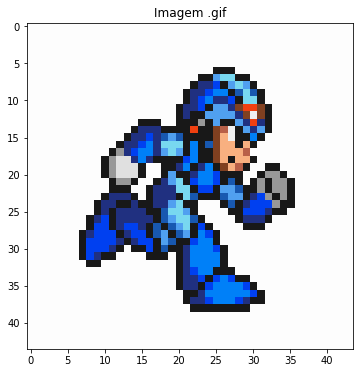

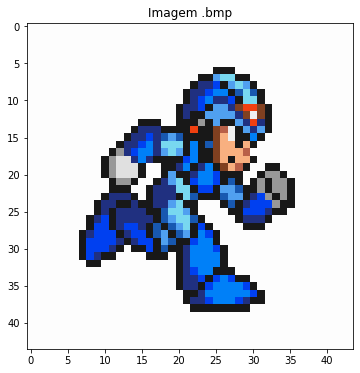

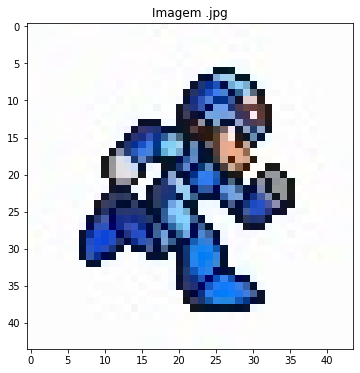

In [27]:
## -- Seu código começa AQUI -- ##

#Leitura da imagem
captura = cv.VideoCapture("megaman.gif")
ret, pic = captura.read()
img = cv.cvtColor(pic, cv.COLOR_BGR2RGB)

#Save nos formatos bmp e jpg
cv.imwrite('megaman.bmp', img)
cv.imwrite('megaman.jpg', img)

#Mede o tamanho dos arquivos
gif_lenght = os.path.getsize('megaman.gif')
bmp_lenght = os.path.getsize('megaman.bmp')
jpg_lenght = os.path.getsize('megaman.jpg')

#Mostra os taanhos das imagens
print("o tamanho da imagem em gif é: " + str(gif_lenght))
print("o tamanho da imagem em bmp é: " + str(bmp_lenght))
print("o tamanho da imagem em jpg é: " + str(jpg_lenght))

#Leitura das novas imagens
bmp = cv.imread('megaman.bmp', cv.IMREAD_COLOR)
jpg = cv.imread('megaman.jpg', cv.IMREAD_COLOR)

#Mostrando as imagens
#plt.figure(figsize = (10,10))  #Melhor visualização
plt.figure(figsize = (6,6))     #Melhor organização com boa visualização
plt.title('Imagem .gif')
plt.imshow(img)

#plt.figure(figsize = (10,10))
plt.figure(figsize = (6,6))
plt.title('Imagem .bmp')
plt.imshow(bmp)

#plt.figure(figsize = (10,10))
plt.figure(figsize = (6,6))
plt.title('Imagem .jpg')
plt.imshow(jpg)

# Como podemos notar, a imagem em bmp é a maior entre elas, pois nela
# não há nenhum tipo de compressão de dados, porém, neste caso, como 
# a imagem bmp foi feita a partir da imagem gif, as características
# visuais de ambas são as mesmas, diferente da imagem em jpg, que sofreu
# alterações de cor, devido ao processo de compactação JPEG.

## -- Seu código termina AQUI -- ##

Resolução da parte 3 do exercício (Para melhor organização, as duas partes foram separadas)

o tamanho da imagem em gif é: 14975
o tamanho da imagem em bmp é: 70434
o tamanho da imagem em jpg é: 13505


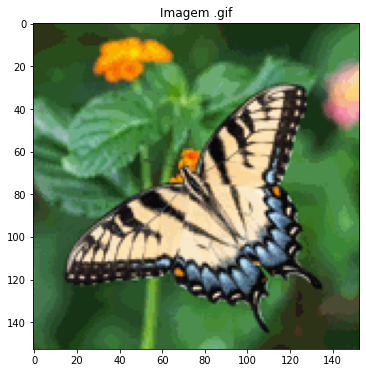

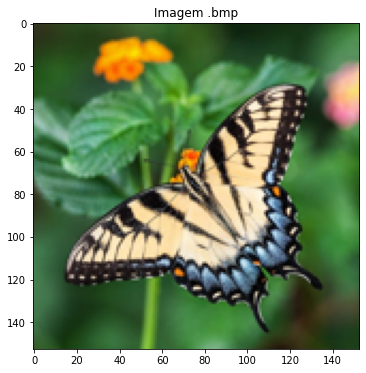

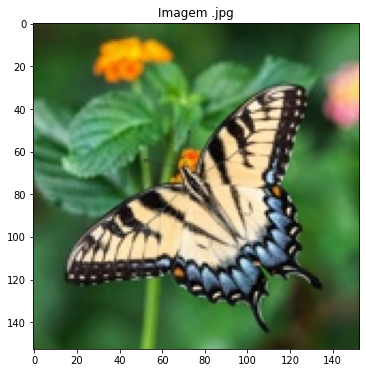

In [4]:
## -- Seu código começa AQUI -- ##

#Leitura da imagem gif
captura = cv.VideoCapture("borboleta.gif")
ret, pic = captura.read()
img = cv.cvtColor(pic, cv.COLOR_BGR2RGB)

#Leitura da imagem bmp
_bmp = cv.imread('borboleta.bmp', cv.IMREAD_COLOR)
bmp = cv.cvtColor(_bmp, cv.COLOR_BGR2RGB)

#Save no formato jpg
cv.imwrite('borboleta.jpg', bmp)

#Leitura da imagem jpg
jpg = cv.imread('borboleta.jpg', cv.IMREAD_COLOR)

#Mede o tamanho dos arquivos
gif_lenght = os.path.getsize('borboleta.gif')
bmp_lenght = os.path.getsize('borboleta.bmp')
jpg_lenght = os.path.getsize('borboleta.jpg')

#Mostra os taanhos das imagens
print("o tamanho da imagem em gif é: " + str(gif_lenght))
print("o tamanho da imagem em bmp é: " + str(bmp_lenght))
print("o tamanho da imagem em jpg é: " + str(jpg_lenght))

#Mostrando as imagens
#plt.figure(figsize = (10,10))  #Melhor visualização
plt.figure(figsize = (6,6))     #Melhor organização com boa visualização
plt.title('Imagem .gif')
plt.imshow(img)

#plt.figure(figsize = (10,10))
plt.figure(figsize = (6,6))
plt.title('Imagem .bmp')
plt.imshow(bmp)

#plt.figure(figsize = (10,10))
plt.figure(figsize = (6,6))
plt.title('Imagem .jpg')
plt.imshow(jpg)

# Diferente do caso anterior, neste caso, já havia uma imagem em bmp
# e a imagem gif, e a imagem jpg foi criada a partir da imagem bmp,
# por este motivo, podemos notar que apesar dos tamanhos das imagens
# gif e jpg possuírem tamanhos próximos e a imagem bmp um tamano maior
# assim como no caso anterior, temos que a resolução das imagens é
# diferente, pois a imagem em bmp, não foi gerada a partir da imagem gif,
# e sim importada diretamente pelo openCV, e a imagem jpg, apesar de 
# realizar a compactação da imagem, não gerou distorções, pois foi feita
# a partir da imagem bmp, já a imagem gif, teve perda de resolução
# provavelmente no processo de transformá-la em uma imagem gif, que foi
# importada neste exercício pelo openCV.



## -- Seu código termina AQUI -- ##

### 3) Transformação de espaço de cores

**Exercício:**

1. Decomponha a imagem ```bird.png``` em suas três componentes RGB. Mostre cada uma delas. Utilize a função ```cv.imread``` para a leitura.
2. Transforme-a para HSV e mostre cada componente.
3. Transforme-a para CMY e mostre cada componente.
4. Utilize *subplot* para organizar as imagens, sendo 1 linha para cada espaço de cor. Coloque título em todas as imagens. 

<details>    
<summary>
    <font size="3" color="darkblue"><b>Dicas:</b></font>
</summary>

*  Utilize a função [plt.subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) para criar *subplots*. 
*  Utilize a função [plt.title](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html) para colocar título nas imagens.
 

*Ex:*
``` python
# Cria um subplot com 2 linhas e 2 colunas. 
# O último argumento especifica qual plot você irá utilizar
plt.subplot(2,2,1) 

plt.title("Meu título aqui")
```

Text(0.5, 1.0, 'Original')

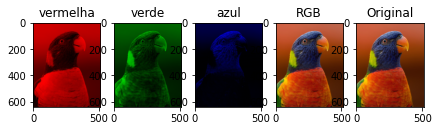

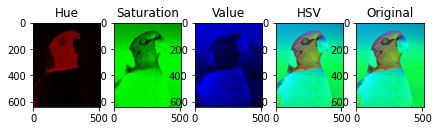

In [14]:
## -- Seu código começa AQUI -- ##

#Leitura e conversão para rgb
bird_bgr = cv.imread("bird.png", cv.IMREAD_COLOR)
bird_RGB = cv.cvtColor(bird_bgr, cv.COLOR_BGR2RGB)
bird_HSV = cv.cvtColor(bird_bgr, cv.COLOR_BGR2HSV)
#bird_CMY = cv.cvtColor(bird_bgr, cv.COLOR_BGR2)

#divisão dos canais de cores e criação de uma matriz nula
Vermelho, Verde, Azul = cv.split(bird_RGB)

Hue, Saturation, Value = cv.split(bird_HSV)

zeros = np.zeros(bird_RGB.shape[:2], dtype = "uint8")

#Criação das imagens com uma cor só
bird_R = cv.merge([Vermelho, zeros, zeros])
bird_G = cv.merge([zeros, Verde, zeros])
bird_B = cv.merge([zeros, zeros, Azul])

bird_H = cv.merge([Hue, zeros, zeros])
bird_S = cv.merge([zeros, Saturation, zeros])
bird_V = cv.merge([zeros, zeros, Value])

#Recriação da imagem original a partir das componentes
bird_RGB_Conc = cv.merge([Vermelho, Verde, Azul])
bird_HSV_Conc = cv.merge([Hue, Saturation, Value])

#Plot das imagens RGB
plt.figure(figsize = (7,7))
plt.subplot(1,5,1)
plt.imshow(bird_R)
plt.title("vermelha")

plt.subplot(1,5,2)
plt.imshow(bird_G)
plt.title("verde")

plt.subplot(1,5,3)
plt.imshow(bird_B)
plt.title("azul")

plt.subplot(1,5,4)
plt.imshow(bird_RGB_Conc)
plt.title("RGB")

plt.subplot(1,5,5)
plt.imshow(bird_RGB)
plt.title("Original")

#Plot das imagens HSV
plt.figure(figsize = (7,7))
plt.subplot(1,5,1)
plt.imshow(bird_H)
plt.title("Hue")

plt.subplot(1,5,2)
plt.imshow(bird_S)
plt.title("Saturation")

plt.subplot(1,5,3)
plt.imshow(bird_V)
plt.title("Value")

plt.subplot(1,5,4)
plt.imshow(bird_HSV_Conc)
plt.title("HSV")

plt.subplot(1,5,5)
plt.imshow(bird_HSV)
plt.title("Original")

#Plot das imagens CMY




## -- Seu código termina AQUI -- ##

### 4) Filtragem de imagens coloridas

4.1) Filtro passa-baixa.

**Exercício:**

1. Filtrar a imagem ```canal.png``` em RGB com o filtro da média $13\times13$.
2. Converter a imagem de RGB para HSV, separar as componentes, filtrar a componente (V) com o mesmo filtro anterior, recompor a imagem HSV e reconverter para RGB.
3. Filtrar as 3 componentes (H, S e V) separadamente e reconverter para RGB.
4. Mostre a imagem original e os resultados anteriores. Utilize *subplot*. O que se pode concluir?

<details>    
<summary>
    <font size="3" color="darkblue"><b>Dicas:</b></font>
</summary>

*  Você pode utilizar a função [np.stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html) para empilhar os diferentes canais. O argumento `axis` especifica em qual dimensão as imagens serão empilhadas. Caso seja especificado como `-1`, a última dimensão será utilizada.

* A função [cv.blur](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37) pode ser útil para o filtro da média.
 

*Ex:*
``` python
np.stack((A,B),axis=-1)
cv.blur(myImg,(kSize,kSize))
```

Text(0.5, 1.0, 'HSV com filtros nas 3 comp')

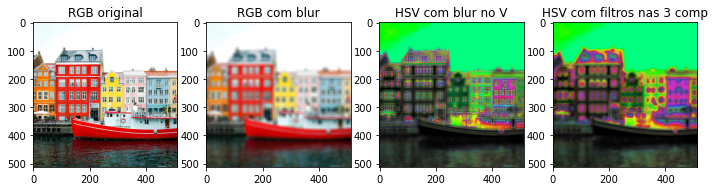

In [31]:
## -- Seu código começa AQUI -- ##

#leitura da imagem
canal_bgr = cv.imread("canal.png", cv.IMREAD_COLOR)

#Conversão para RGB
canal_RGB = cv.cvtColor(canal_bgr, cv.COLOR_BGR2RGB)

#Conversão para HSV
canal_HSV = cv.cvtColor(canal_bgr, cv.COLOR_BGR2RGB)

#Matriz nula para criação das imagens com uma componente
zero = np.zeros(canal_HSV.shape[:2], dtype="uint8")

#Separação das componentes
H, S, V = cv.split(canal_HSV) 

#Montagem das 3 componentes da HSV
canal_H = cv.merge([H, zero, zero])
canal_S = cv.merge([zero, S, zero])
canal_V = cv.merge([zero, zero, V])

#Filtragem
canal_RGB_f = cv.blur(canal_RGB, (13,13))


H_f = cv.blur(H, (13,13))
S_f = cv.blur(S, (13,13))
V_f = cv.blur(V, (13,13))

#Recomposição da HSV
canal_HSVf = cv.merge([H,S,V_f])

canal_HfSfVf = cv.merge([H_f, S_f, V_f])

#Conversão para RGB
canal_HSVf_RGB = cv.cvtColor(canal_HSVf, cv.COLOR_HSV2RGB)

canal_HfSfVf_RGB = cv.cvtColor(canal_HfSfVf, cv.COLOR_HSV2RGB)

#Plot das imagens
plt.figure(figsize = (15,15))

plt.subplot(1,5,1)
plt.imshow(canal_RGB)
plt.title("RGB original")

plt.subplot(1,5,2)
plt.imshow(canal_RGB_f)
plt.title("RGB com blur")

plt.subplot(1,5,3)
plt.imshow(canal_HSVf_RGB)
plt.title("HSV com blur no V")

plt.subplot(1,5,4)
plt.imshow(canal_HfSfVf_RGB)
plt.title("HSV com filtros nas 3 comp")

#O filtro aplicado na imagem RGB, realiza o efeito já conhecido
#do blur, porém quando aplicado sobre o HSV, ele altera as cores
#da imagem, isto se deve ao fato da componente V se referenciar
#as cores da imagem.

## -- Seu código termina AQUI -- ##

4.2) Filtro passa-alta.

**Exercício:**

1. Faça os mesmos passos do exercício anterior, porém utilizando um filtro de aguçamento de $3\times3$.
2. Faça a diferença entre a imagem original e as filtradas.
3. Mostre a imagem original e os resultados. Utilize *subplot*. O que se pode concluir?

Text(0.5, 1.0, 'HSV com filtros nas 3 comp')

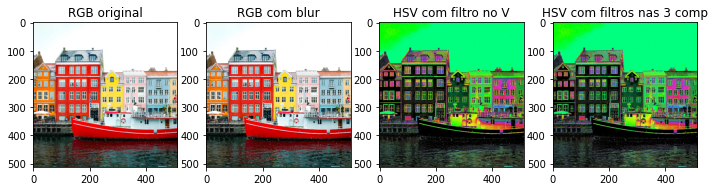

In [44]:
## -- Seu código começa AQUI -- ##

#geração do kernel de aguçamento
kernel = np.array(((-1, -1, -1),
                   (-1, 17, -1),
                   (-1, -1, -1)))
kernel_N = kernel/9 #Kernel normalizado

#Filtragem
canal_RGB_PA = cv.filter2D(canal_RGB, -1, kernel_N)


H_PA = cv.filter2D(H, -1, kernel_N)
S_PA = cv.filter2D(S, -1, kernel_N)
V_PA = cv.filter2D(V, -1, kernel_N)

#Recomposição da HSV
canal_HSVPA = cv.merge([H,S,V_PA])

canal_HSV_PA = cv.merge([H_PA, S_PA, V_PA])

#Conversão para RGB
canal_HSVPA_RGB = cv.cvtColor(canal_HSVPA, cv.COLOR_HSV2RGB)

canal_HSV_PA_RGB = cv.cvtColor(canal_HSV_PA, cv.COLOR_HSV2RGB)

#Plot das imagens
plt.figure(figsize = (15,15))

plt.subplot(1,5,1)
plt.imshow(canal_RGB)
plt.title("RGB original")

plt.subplot(1,5,2)
plt.imshow(canal_RGB_PA)
plt.title("RGB com blur")

plt.subplot(1,5,3)
plt.imshow(canal_HSVPA_RGB)
plt.title("HSV com filtro no V")

plt.subplot(1,5,4)
plt.imshow(canal_HSV_PA_RGB)
plt.title("HSV com filtros nas 3 comp")

#Pode-se concluir que neste caso, para a imagem em HSV
#os contornos tiveram maior destaque, como esperado
#pelo aguçamento, já em HSV, as imagens, ass regiões que 
#possuiam variação de saturação, ou cores foram realçadas
#realizando um efeito visual distinto da operação em RGB


## -- Seu código termina AQUI -- ##

### 5) Aplicação

Você faz parte de um projeto cujo objetivo é rastrear a trajetória de uma bola de cor verde em um vídeo. Sua tarefa será gerar um vídeo que detecte e isole a bola utilizando visão computacional.

Um trecho do vídeo utilizado como entrada para o código pode ser visto a seguir.

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/imagens/pratica_05/ball-tracking-animated-02.gif?raw=true\" style="width:531px;height:317px;"></center>

<center><caption><b> Figura 3:</b> Movimento da bola.</b></caption></center>

Sua tarefa será fazer o pré-processamento da imagem, passando um filtro passa-baixa e entregando os frames para o restante do código em HSV. Em seguida, no código já pronto, será aplicada uma máscara levando em consideração níveis de verde claro até escuro.

Caso queira obter mais informações sobre o projeto, visite esse [blog](https://www.pyimagesearch.com/2015/09/14/ball-tracking-with-opencv/).

**Exercício:**

1. Aplique um filtro Gaussiano de modo a eliminar altas frequências e focar em objetos estruturais da imagem. Converta o frame filtrado de RGB para HSV. 

Obs: Varie o tamanho do *kernel* e verifique o resultado.

*Dicas:* 
  *   Utilize a função [cv.GaussianBlur](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1);
  *   Caso rode o código novamente, certifique-se sempre que excluir o arquivo "ball_tracking_example_out_compressed.mp4" antes de gerar um novo. Sobrescrever o arquivo pode causar erro.

*Ex:*
``` python
cv.GaussianBlur(myImg,(ksize,ksize),0)
```

In [45]:
# Execute este código se quiser ver o vídeo original
mp4 = open("ball_tracking_example.mp4",'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [55]:
greenLower = (29,86,6) #verde escuro
greenUpper = (64, 255, 162) #verde claro
# Cria o objeto VideoCapture
vs = cv.VideoCapture( "ball_tracking_example.mp4")
# Defina o codec e cria o objeto VideoWriter. A saída é armazenada no arquivo 'ball_tracking_example_out.mp4'.
out = cv.VideoWriter("ball_tracking_example_out.mp4",cv.VideoWriter_fourcc(* "MP4V" ), 20.0, (432,240))

#Percorre todos os frames
while True:
  # Leitura do frame
  ret, frame = vs.read()
  # Caso nao tenha mais nenhum frame
  if frame is None :
    break
  frame = cv.resize(frame,(432,240)) # Para processar mais rápido o frame

  ## -- Seu código começa AQUI -- input frame ##
  blurred = cv.GaussianBlur(frame, (21,21), 0)
  hsv =  cv.cvtColor(blurred, cv.COLOR_BGR2HSV ) 
  ## -- Seu código termina AQUI -- output hsv ##

  mask = cv.inRange(hsv, greenLower, greenUpper)
  mask = cv.erode(mask, None, iterations = 2)
  mask = cv.dilate(mask, None, iterations = 2)
  res = cv.bitwise_and(frame, frame, mask = mask)
  # Escreve o frame no arquivo
  out.write(res)

out.release()

os.system(f"ffmpeg -i ball_tracking_example_out.mp4 -vcodec libx264 ball_tracking_example_out_compressed.mp4")

0

In [56]:
# Execute este código se quiser ver o vídeo original
mp4 = open("ball_tracking_example_out_compressed.mp4",'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)